## Graphical User Input

In [3]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np
axes = plt.gca()
axes.set_xlim([1,5])
axes.set_ylim([1,5])
print("Please click")
x = plt.ginput(n=10, timeout=30, show_clicks=True, mouse_add=1, mouse_pop=3, mouse_stop=2)
points = []
for i in range(len(x)):
    points.append([x[i][0], x[i][1]])

Please click


## Відкриття файлу

In [ ]:
def open_file(path_file):
    f=open(path_file, "r")
    t = int(f.readline())
    points = []
    for i in range(t):
        l = f.readline()
        l = l.split()
        ls = []
        for elem in l:
            ls.append(float(elem))
        points.append(ls)
    return points

points = open_file("points.txt")

## Points random 2d

In [2]:
import numpy as np
N = 1000
x = np.random.rand(N) * 10000
y = np.random.rand(N) * 10000
points = []
for i in range(len(x)):
    points.append([x[i], y[i]])

## Points random 3d

In [12]:
N = 100
x = np.random.rand(N) * 10000
y = np.random.rand(N) * 10000
z = np.random.rand(N) * 10000
points = []
for i in range(len(x)):
    points.append([x[i], y[i], z[i]])

## Show 3D

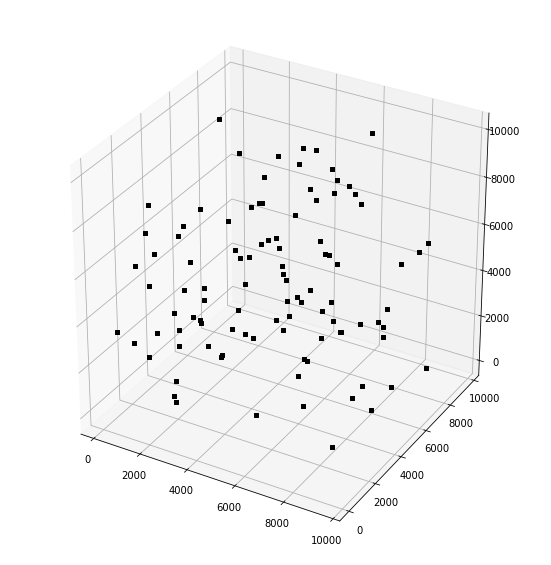

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as plt3d

fig = plt.figure()
fig.set_size_inches(10,10)
ax = fig.add_subplot(111, projection='3d', aspect='equal')

for x, y, z in points:
    ax.scatter(x, y, z, color='black', marker='s')

## show 2D

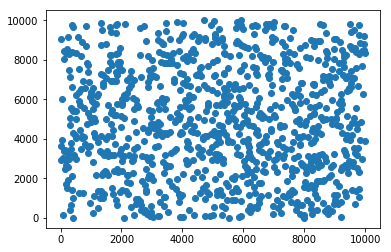

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = []
y = []
for i in range(len(points)):
    x.append(points[i][0])
    y.append(points[i][1])

plt.scatter(x, y)
plt.show()
# print(points)

##  Побудова графа

In [ ]:
import math

import numpy as np
from scipy.spatial import Delaunay

tri = Delaunay(points)

edges = set()

def generate_all_possible_edges(tri):
    for triangle in tri.simplices:
        for i in range(len(triangle)):
            for j in range(i + 1, len(triangle)):
                if i == j: 
                    continue
                l = (triangle[i], triangle[j])
                edges.add(l)
                
generate_all_possible_edges(tri)

def dist(point1, point2):
    res = 0
    for i in range(len(point1)):
        diff = abs(point1[i] - point2[i])
        res += diff * diff
    return math.sqrt(res)

def build_graph(points, edges):
    graph = []
    for edge in edges:
        weighted_edge = (dist(points[edge[0]], points[edge[1]]), edge[0], edge[1])
        graph.append(weighted_edge)
    return graph

from __future__ import print_function


class Graph(object):
    """ Simple implementation of directed acyclic graph
    Parameters
    ----------
    nodes : set
            set of all nodes in the graph
    dependencies : list
            list of tuples (weight, node1, node2) which show connection
            between nodes of the graph with appropriate weight
    """
    def __init__(self, nodes, dependencies):
        self.nodes = nodes
        self.dependencies = dependencies
        self.parent = {}
        self.rank = {}

    def __str__(self):
        """ string representation of the graph """
        string = ''
        for node in sorted(self.nodes):
            strnode = ["{} -> {} ({})".format(start, end, w)
                       for w, start, end in self.dependencies if start == node]
            string += "node {}: {}\n".format(node, " ".join(strnode))
        return string[:-1]

    def find(self, edge):
        """ for current edge return parent edge """
        if self.parent[edge] != edge:
            self.parent[edge] = self.find(self.parent[edge])
        return self.parent[edge]

    def union(self, edge1, edge2):
        """ union edge1 and edge2 into one tree """
        root1 = self.find(edge1)
        root2 = self.find(edge2)
        if root1 == root2:
            return
        if self.rank[root1] > self.rank[root2]:
            self.parent[root2] = root1
        else:
            self.parent[root1] = root2
            if self.rank[root1] == self.rank[root2]:
                self.rank[root2] += 1

    def minimum_spanning_tree(self):
        """ a minimum spanning tree
        Returns
        -------
        out : set
              return a set of tuples (weight, node1, node2)
              with minimum spanning tree for a connected weighted graph
        """
        # make_set
        self.parent = {node: node for node in self.nodes}
        self.rank = {node: 0 for node in self.nodes}
        # sort edges
        # weight should be first item in tuple
        edges = self.dependencies
        edges.sort()
        # set initial tree
        minimum_spanning_tree = set()
        for weight, edge1, edge2 in edges:
            if self.find(edge1) != self.find(edge2):
                # union edge1 and edge2
                self.union(edge1, edge2)
                # add new dependence to the tree
                minimum_spanning_tree.add((weight, edge1, edge2))

        return minimum_spanning_tree


GRAPH_NODES = []
for i in range(len(points)):
    GRAPH_NODES.append(i)
# [(weight, node1, node2), ...]
GRAPH_DEPENDECIES = build_graph(tri.points, edges)
GRAPH = Graph(GRAPH_NODES, GRAPH_DEPENDECIES)
print("Show graph:\n{}\n".format(GRAPH))
print("Minimum spanning tree: {}".format(GRAPH.minimum_spanning_tree()))

## Show 3D

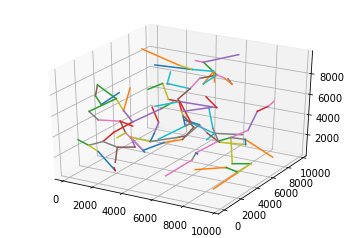

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



for edge in connected_edges:
    index_start_point = edge[1]
    index_end_point = edge[2]
    xs = [tri.points[index_start_point][0], tri.points[index_end_point][0]]
    ys = [tri.points[index_start_point][1], tri.points[index_end_point][1]]
    zs = [tri.points[index_start_point][2], tri.points[index_end_point][2]]
    ax.plot(xs=xs, ys=ys, zs=zs)
    
plt.show()

## Show 2D

In [ ]:
import numpy as np
x = []
y = []
connected_edges = GRAPH.minimum_spanning_tree()
for edge in connected_edges:
    index_start_point = edge[1]
    index_end_point = edge[2]
    x = []
    y = []
    x.append(tri.points[index_start_point][0])
    x.append(tri.points[index_end_point][0])
    y.append(tri.points[index_start_point][1])
    y.append(tri.points[index_end_point][1])
    plt.plot(x, y)

    
plt.plot(x, y)
plt.show()